# Exploring Why Civil Resistance Works
---

> Gaganis Michail, Pregraduate Student <br />
> Department of Management Science and Technology <br />
> Athens University of Economics and Business <br />
> t8200234@aueb.gr

* This presentation contains a study on the Civil Resistance movements across the world from 1900-onwards.

* This study takes inspiration from the book [Why Civil Resistance Works](https://www.ericachenoweth.com/research/wcrw) by [Erica Chenoweth](https://www.ericachenoweth.com/) and Maria J. Stephan.

* The research done in this repository is done in the in the context of the *Applied Machine Learning* course, taught by *Mr. Panos Louridas* at the *Department of Management Science and Technology, AUEB*. The assignment can be found [here](/assignment/wcrw_v2.ipynb).

* The study takes place in November-December of `2023`, and references data up until that point in time.

# Before we Start

We first need to go over the dependecies needed for this notebook to function properly, as well as introduce our data.

### Dependencies for this Notebook

* In this Jupyter Notebook we shall use Python modules that the reader may or may not have installed. 
* The following code block shall install those for them so that no functionality problems arise due to missing modules.

* Links to documentation for all modules used can be found below:<br/>
-[Numpy](https://numpy.org/)<br/>
-[Scikit-learn](https://scikit-learn.org/stable/)<br/>
-[MatPlotLib](https://matplotlib.org/)<br/>
-[Pandas](https://pandas.pydata.org/)<br/>
-Seaborn
-Statsmodels

* We should go ahead and import the modules as well.

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
from statsmodels.formula.api import logit
import country_converter as coco
import logging

### Data Used 
* For our research we will draw data from the [Nonviolent and Violent Campaigns and Outcomes (NAVCO) Dataset](https://dataverse.harvard.edu/dataverse/navco), and in particular the [NAVCO 1.2 Dataset](data/NAVCO_data.tab). In the repository is included the [NAVCO Data dictionary](data/NAVCO_data_dictionary.pdf) that provides more clarity as to what the different variables measure.

* We shall also use data from the [Polity Project](https://www.systemicpeace.org/polityproject.html), available from [Integrated Network for Societal Conflict Research (INSCR)](https://www.systemicpeace.org/inscrdata.html), in particular the [Polity5 Annual Time-Series, 1946-2018](http://www.systemicpeace.org/inscr/p5v2018.xls). The [Polity5 Data Dictionary](data/Polity5DataDictionary.pdf) is provided as well for all intensive purposes.

* We load our data in *Pandas Dataframes* so we can use them for analysis.

In [41]:
navco_data = pd.read_csv('data/NAVCO_data.tab', sep='\t')
navco_data.head(5)

,NAVCOID,CAMPAIGN,LOCATION,BYEAR,EYEAR,TARGET,SUCCESS,LIMITED,FAILURE,ONGOING,...,OTHER,DURATION,PARTICIPATION,PERCENTAGEPOPULARPARTICIPATION,REGVIOL,DEFECT,VIOLENTFLANK,VIOLSIM,REGAID,STATESUP
0,4.0,Afghans,Afghanistan,1978.0,1979.0,Afghan government,1.0,0.0,0.0,0.0,...,0.0,613.0,10000.0,0.000641,1.0,1.0,NaN,1.0,1.0,1.0
1,3.0,Afghan resistance,Afghanistan,1980.0,1989.0,Soviet occupation,1.0,0.0,0.0,0.0,...,0.0,3281.0,10000.0,0.000685,1.0,0.0,NaN,1.0,0.0,1.0
2,218.0,Taliban/anti-government forces,Afghanistan,1992.0,1996.0,Afghan regime,1.0,0.0,0.0,0.0,...,0.0,1370.0,20000.0,0.000893,1.0,0.0,NaN,1.0,0.0,0.0
3,217.0,Taliban,Afghanistan,2001.0,2014.0,Afghan government,0.0,0.0,1.0,1.0,...,0.0,4391.0,60000.0,0.001625,1.0,1.0,NaN,1.0,1.0,0.0
4,5.0,Albanian anti-communist,Albania,1990.0,1991.0,Communist regime,1.0,0.0,0.0,0.0,...,0.0,442.0,300000.0,0.091068,1.0,0.0,0.0,1.0,1.0,0.0


In [42]:
polity_data = pd.read_csv('data/polity_data.csv')
polity_data.head(5)

,p5,cyear,ccode,scode,country,year,flag,fragment,democ,autoc,...,interim,bmonth,bday,byear,bprec,post,change,d5,sf,regtrans
0,0,7001800,700,AFG,Afghanistan,1800,0,NaN,1,7,...,NaN,1.0,1.0,1800.0,1.0,-6.0,88.0,1.0,NaN,NaN
1,0,7001801,700,AFG,Afghanistan,1801,0,NaN,1,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,7001802,700,AFG,Afghanistan,1802,0,NaN,1,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,7001803,700,AFG,Afghanistan,1803,0,NaN,1,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,7001804,700,AFG,Afghanistan,1804,0,NaN,1,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Introduction

* Erica Chenoweth and Maria J. Stephan published a book in 2011 called *Why Civil Resistance Works: The Strategic Logic of Nonviolent Conflict*. 

* The book contains an in-depth analysis of many Civil Resistance movements through 1900 to 2014, and seeks to compare the success rate of violent and non-violent movements.
* The dataset used to draw conclusions for the book is public and used in this notebook.
* This presentation is complementary to the book as it seeks to cross-validate the findings noted, as well as dig deeper and draw its own cocnlusions.

>## 1. Exploration of Historical Trends
>Create a plot showing the frequency of nonviolent and violent campaigns; the frequency should be counted based on their end years, at decades. The violent and nonviolent campaign counts should be stacked on each other.

* We take a look at the frequency of violent and non-violent events over the years.

* The `EYEAR` column describes the year a campaign ended, so were going to use that for refrence. Meaning, we count an event in a decade if it ended in that decade.
* We should check whether all events have valid end years.

In [43]:
navco_data['EYEAR'].isna().sum()

0

* So all our entries our valid.
* We should also check the span of the years so that we don't find any irregularities, and we should also need the span for our graph later on.

In [44]:
print(navco_data['EYEAR'].min().astype(int), navco_data['EYEAR'].max().astype(int))

1946 2014


* The end years of events span from `1946 - 2014` so we shall counts the decades from the `40's` up until the `2010`'s.
* We go ahead and create a frame with the relevant information.
* The `VIOL` and `NONVIOL` columns are binary columns, indicating whether or not an event was violent.

In [45]:
rounded_down_data = pd.DataFrame({
    'ID': navco_data['NAVCOID'],
    'Year': (10 * (navco_data['EYEAR'] // 10)),
    'Not Violent': navco_data['NONVIOL'],
    'Violent': navco_data['VIOL']
})
rounded_down_data.head()

,ID,Year,Not Violent,Violent
0,4.0,1970.0,0.0,1.0
1,3.0,1980.0,0.0,1.0
2,218.0,1990.0,0.0,1.0
3,217.0,2010.0,0.0,1.0
4,5.0,1990.0,1.0,0.0


* We create 2 seperate frames that contain the sum of violent and non-violent events for wach decade.

In [46]:
violent_data = rounded_down_data.groupby(by = 'Year')['Violent'].sum()
non_violent_data = rounded_down_data.groupby(by = 'Year')['Not Violent'].sum()

* And now we can plot them as we like.
* We're using a *stack plot* for this purpose.
* The stack plot shows the cumulative events on each decade, and diversifies between violent and not by color. 

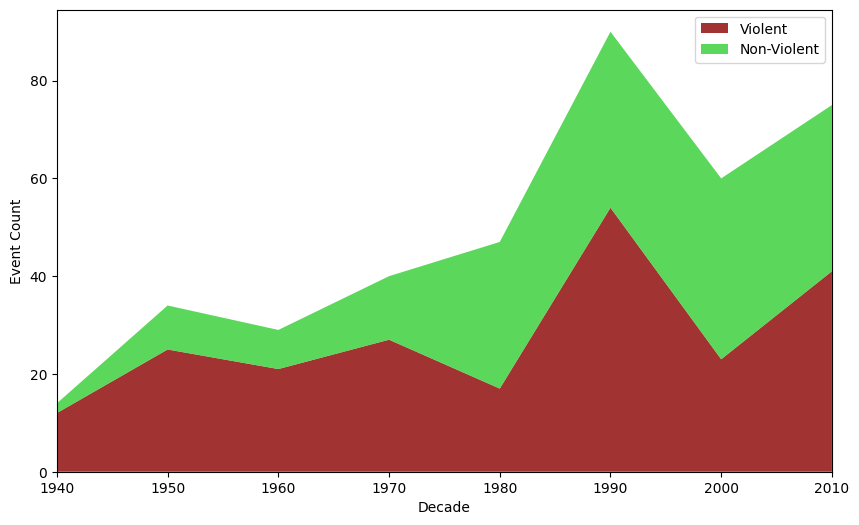

In [47]:
plt.figure(figsize=(10, 6))
plt.stackplot(
    violent_data.index, [violent_data, non_violent_data],
    labels=['Violent', 'Non-Violent'],
    colors=['darkred', 'limegreen'],
    alpha=0.8
)
plt.xlabel('Decade')
plt.ylabel('Event Count')
plt.legend()
plt.xlim(1940, 2010)
plt.show()

* We can see that there is a trend where with time passing, non-violent events tend to outnumber violent ones.

>Create a plot showing, for each decade from 1940 onwards, the number of nonviolent campaigns and the percentage of success. Your plot will have two vertical axes, one for each of the metrics.

* To achieve this, we first need to keep the number of succesful non-violent campaigns.

In [48]:
successful_nonviolent_data = rounded_down_data[(rounded_down_data['Not Violent'] == 1) & (navco_data['SUCCESS'] == 1)]
decade_counts = successful_nonviolent_data.groupby('Year')['ID'].count().reset_index()
decade_counts.columns = ['Year', 'Successful Events']
decade_counts

,Year,Successful Events
0,1940.0,1
1,1950.0,2
2,1960.0,2
3,1970.0,7
4,1980.0,14
5,1990.0,30
6,2000.0,25
7,2010.0,13


* And keep them together with the number of non violent events in total, to divide:

In [49]:
non_violent_data = non_violent_data.reset_index() #resetting index to make year a column
non_violent_with_success = pd.merge(non_violent_data, decade_counts, on='Year', how='left')

non_violent_with_success

,Year,Not Violent,Successful Events
0,1940.0,2.0,1
1,1950.0,9.0,2
2,1960.0,8.0,2
3,1970.0,13.0,7
4,1980.0,30.0,14
5,1990.0,36.0,30
6,2000.0,37.0,25
7,2010.0,34.0,13


* So we calculate the percentage of success per decade:

In [50]:
non_violent_with_success['Percentage of Success'] = non_violent_with_success['Successful Events'] / non_violent_with_success['Not Violent']
non_violent_with_success

,Year,Not Violent,Successful Events,Percentage of Success
0,1940.0,2.0,1,0.500000
1,1950.0,9.0,2,0.222222
2,1960.0,8.0,2,0.250000
3,1970.0,13.0,7,0.538462
4,1980.0,30.0,14,0.466667
5,1990.0,36.0,30,0.833333
6,2000.0,37.0,25,0.675676
7,2010.0,34.0,13,0.382353


* Now we can plot our data.

* We use a twin axis plot, meaning that there are 2 different *y axes* on the same *x axis*. 
* The y axis on the left shows the number of non-violent campaigns per decade.
* The y axis on the right shows a percentage of successful non-violent campaigns per decade. 
* The bars are color coded and match with the color they share with the axis.

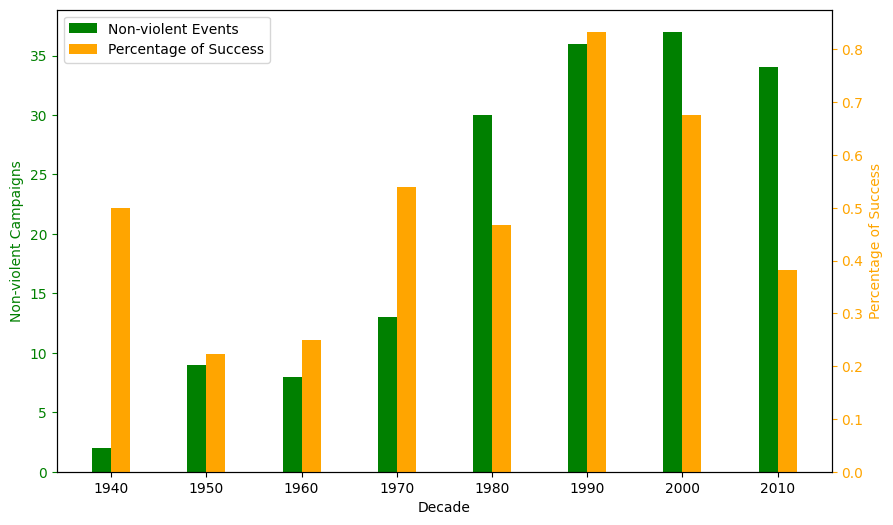

In [51]:
fig, ax1 = plt.subplots(figsize=(10, 6))
bar_width = 2
bar1 = ax1.bar(non_violent_with_success['Year'] - bar_width/2, non_violent_with_success['Not Violent'], bar_width, label='Non-violent Events', color='green')
#set labels & ticks for 1 axis
ax1.set_xlabel('Decade')
ax1.set_ylabel('Non-violent Campaigns', color='green')
ax1.tick_params('y', colors='green')
#create 2nd axis
ax2 = ax1.twinx()
bar2 = ax2.bar(non_violent_with_success['Year'] + bar_width/2, non_violent_with_success['Percentage of Success'], bar_width, label='Percentage of Success', color='orange')
#set labels & ticks for 2nd
ax2.set_ylabel('Percentage of Success', color='orange')
ax2.tick_params('y', colors='orange')
#combine legend
bars = [bar1, bar2]
labels = [bar.get_label() for bar in bars]
ax1.legend(bars, labels, loc='upper left')

_ = plt.show()

* From here we can tell that as time goes on, non-violent campaigns tend to be more succesful than non-violent campaigns in the past.

* Meaning that, in general, social culture has steadily shifted in a way that allows for peaceful public expression to be impactful.

>Create a plot showing the success rate for violent and nonviolent campaigns by decade.

* We need to find the succes rate for violent campaigns the same way we did for non-violent ones.

In [52]:
#find succesful violent events
successful_violent_data = rounded_down_data[(rounded_down_data['Violent'] == 1) & (navco_data['SUCCESS'] == 1)]
#group by year and count
decade_counts = successful_violent_data.groupby('Year')['ID'].count().reset_index()
decade_counts.columns = ['Year', 'Successful Events']
violent_data = violent_data.reset_index()#reset index to make Year a column
#merge the two dataframes
violent_with_success = pd.merge(violent_data, decade_counts, on='Year', how='left')
violent_with_success

,Year,Violent,Successful Events
0,1940.0,12.0,6
1,1950.0,25.0,8
2,1960.0,21.0,4
3,1970.0,27.0,12
4,1980.0,17.0,5
5,1990.0,54.0,15
6,2000.0,23.0,3
7,2010.0,41.0,3


In [53]:
violent_with_success['Percentage of Success'] = violent_with_success['Successful Events'] / violent_with_success['Violent']
violent_with_success

,Year,Violent,Successful Events,Percentage of Success
0,1940.0,12.0,6,0.500000
1,1950.0,25.0,8,0.320000
2,1960.0,21.0,4,0.190476
3,1970.0,27.0,12,0.444444
4,1980.0,17.0,5,0.294118
5,1990.0,54.0,15,0.277778
6,2000.0,23.0,3,0.130435
7,2010.0,41.0,3,0.073171


* Now that we have that, for convenience's sake we can put both success rates on a single data frame:

In [54]:
success_rates = pd.DataFrame({
    'Year': violent_with_success['Year'],
    'Violent Success Rate': violent_with_success['Percentage of Success'],
    'Non-Violent Success Rate': non_violent_with_success['Percentage of Success']
})
success_rates

,Year,Violent Success Rate,Non-Violent Success Rate
0,1940.0,0.500000,0.500000
1,1950.0,0.320000,0.222222
2,1960.0,0.190476,0.250000
3,1970.0,0.444444,0.538462
4,1980.0,0.294118,0.466667
5,1990.0,0.277778,0.833333
6,2000.0,0.130435,0.675676
7,2010.0,0.073171,0.382353


* And we can plot our data through there.

* The following graph depicts the success rate of both violent and non-violent campaigns side by side, over the years.

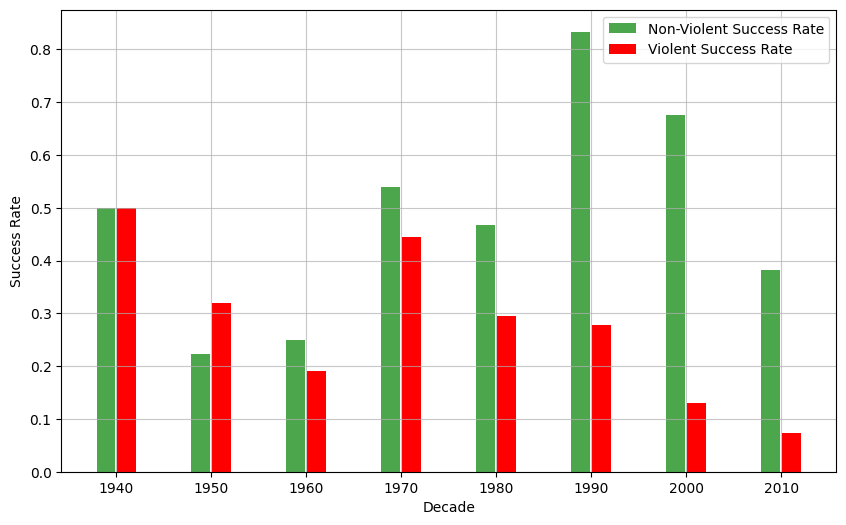

In [74]:
# Plotting
plt.figure(figsize=(10, 6))
#for beauty
bar_width = 2
gap = 0.2
#nonviolent
plt.bar(success_rates['Year'], success_rates['Non-Violent Success Rate'], width=bar_width, color='green', label='Non-Violent Success Rate', alpha=0.7)
#violent
plt.bar(success_rates['Year'] + bar_width + gap, success_rates['Violent Success Rate'], width=bar_width, color='red', label='Violent Success Rate')
#labels & title
plt.xlabel('Decade')
plt.ylabel('Success Rate')
plt.legend()
#manual ticks
tick_positions = success_rates['Year'] + bar_width / 2 + gap / 2
plt.xticks(tick_positions, success_rates['Year'].astype(int))
#grid
plt.grid(True, linestyle='-', alpha=0.7)

_ = plt.show()

* The above graph shows us, that along with with non-violent campaigns being more common compared to violent ones as time passes (as seen on the first graph), they also tend to be more successful.

## 2. Largest Resistance Campaigns, 1946-2014

> Create a horizontal bar plot with the resistance campaigns, for all years, with a percentage of participation at least 2.0%.


* First we need to filter our data so that only events with more than `2%` of the population participating appear.

In [56]:
filtered_data = navco_data[navco_data['PERCENTAGEPOPULARPARTICIPATION'] > 0.02]

* We sort our data:

In [57]:
sorted_data = filtered_data.sort_values(by='PERCENTAGEPOPULARPARTICIPATION', ascending=True)
sorted_data.head()

,NAVCOID,CAMPAIGN,LOCATION,BYEAR,EYEAR,TARGET,SUCCESS,LIMITED,FAILURE,ONGOING,...,OTHER,DURATION,PARTICIPATION,PERCENTAGEPOPULARPARTICIPATION,REGVIOL,DEFECT,VIOLENTFLANK,VIOLSIM,REGAID,STATESUP
132,93.0,Hungarian anti-communist,Hungary,1956.0,1956.0,communist regime,0.0,0.0,1.0,0.0,...,0.0,69.0,200000.0,0.020264,1.0,1.0,1.0,0.0,1.0,0.0
89,74.0,East German uprising,East Germany,1953.0,1953.0,Communist regime,0.0,0.0,1.0,0.0,...,0.0,17.0,400000.0,0.022005,1.0,0.0,0.0,0.0,1.0,0.0
352,314.0,Euromaidan,Ukraine,2013.0,2014.0,President Yanukovych,1.0,0.0,0.0,0.0,...,0.0,94.0,1000000.0,0.022089,1.0,1.0,1.0,1.0,1.0,0.0
304,213.0,South Korean anti-military,South Korea,1986.0,1987.0,Mil govt,1.0,0.0,0.0,0.0,...,0.0,510.0,1000000.0,0.023981,1.0,0.0,1.0,0.0,0.0,0.0
292,23.0,anti-Milosevic,Serbia,1996.0,2000.0,Milosevic regime,1.0,0.0,0.0,0.0,...,0.0,1418.0,200000.0,0.026609,1.0,1.0,0.0,0.0,0.0,1.0


* We need to store some of the columns in order to use them when drawing our plot.

In [58]:
events = sorted_data['LOCATION'] + ': ' + sorted_data['TARGET']
participation_percentage = sorted_data['PERCENTAGEPOPULARPARTICIPATION']
success = sorted_data['SUCCESS']
limited = sorted_data['LIMITED']
failure = sorted_data['FAILURE']

* We go ahead and make our plot. 

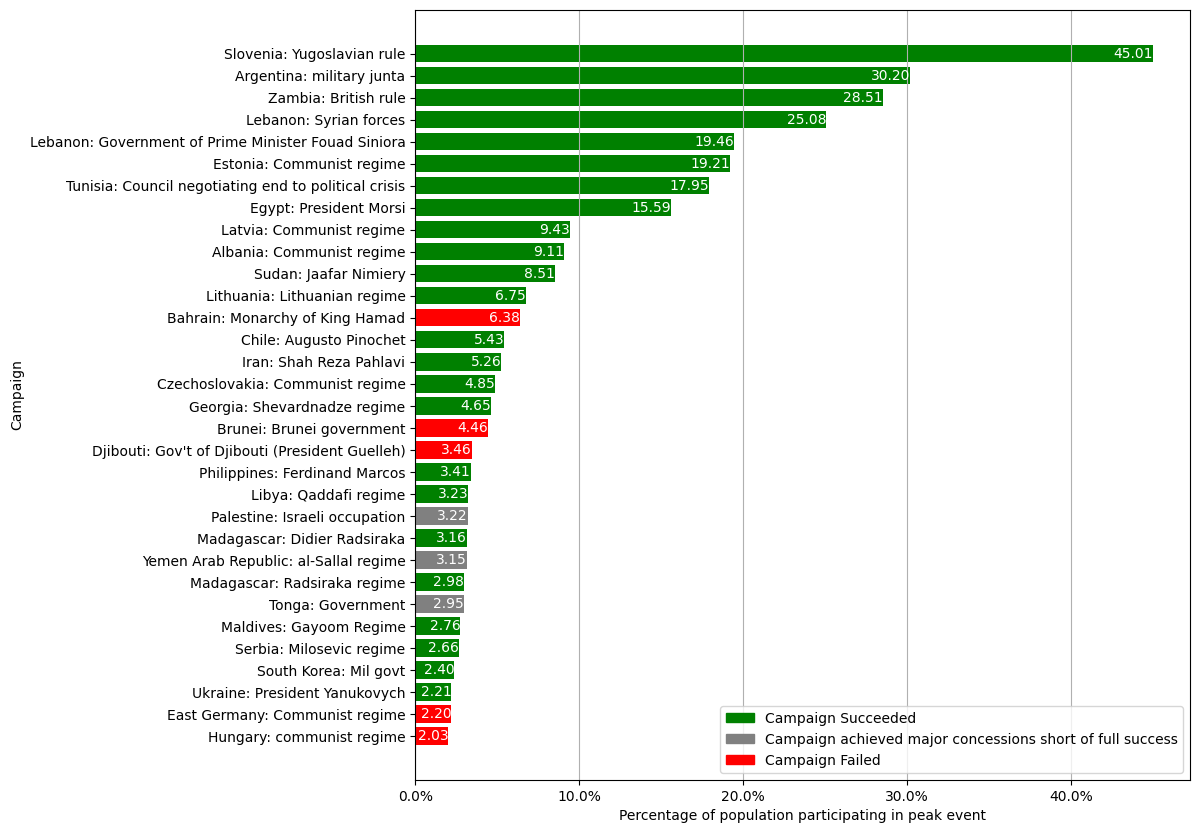

In [75]:
from matplotlib.ticker import FuncFormatter

fig, ax = plt.subplots(figsize=(10, 10))
#color bars depending on status
bars = ax.barh(events, participation_percentage, color=['green' if s == 1 else 'gray' if l == 1 else 'red' for s, l in zip(success, limited)])
#legend
legend_labels = ['Campaign Succeeded', 'Campaign achieved major concessions short of full success', 'Campaign Failed']
legend_colors = ['green', 'gray', 'red']
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in legend_colors]
ax.legend(legend_handles, legend_labels, loc='lower right')
#define function to place ticks in wanted format
def percentage_formatter(x, pos):
    return f'{x*100:.1f}%'
# Set the formatter for the x-axis
ax.xaxis.set_major_formatter(FuncFormatter(percentage_formatter))
#add percentages on bars
for bar, percentage in zip(bars, participation_percentage):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{percentage*100:.2f}', 
             va='center', ha='right', color='white')
#labels
ax.set_xlabel('Percentage of population participating in peak event')
ax.set_ylabel('Campaign')
plt.grid(axis = 'x')
_ = plt.show()


* The graph shows the biggest campaigns of approximately the past century (based on percentage of participation).

* We can also see which succeeded or not.

* We gain a bit of insight regarding the `3.5%` rule coined by Chenoweth, stating that if a campaign has more than `3.5%` of the population participating then it will succeed.

* We'll touch more on that later.

> Investigate, outside the largest resistance campaigns, if you can find anything about Greece.

* Let's take a look at the Greek campaigns included:

In [60]:
navco_data[navco_data['LOCATION'] == 'Greece']

,NAVCOID,CAMPAIGN,LOCATION,BYEAR,EYEAR,TARGET,SUCCESS,LIMITED,FAILURE,ONGOING,...,OTHER,DURATION,PARTICIPATION,PERCENTAGEPOPULARPARTICIPATION,REGVIOL,DEFECT,VIOLENTFLANK,VIOLSIM,REGAID,STATESUP
119,401.0,Greek Civil War,Greece,1946.0,1949.0,British and US occupation,0.0,0.0,1.0,0.0,...,0.0,1778.0,40000.0,0.005092,1.0,0.0,NaN,0.0,1.0,1.0
120,89.0,Greek anti-military,Greece,1973.0,1974.0,Military rule,1.0,0.0,0.0,0.0,...,0.0,654.0,2500.0,0.000279,1.0,1.0,1.0,0.0,1.0,0.0


* The dataset includes the [Greek Civil war](https://en.wikipedia.org/wiki/Greek_Civil_War), as well as the [anti Military rule or *anti-junta* movement](https://en.wikipedia.org/wiki/Greek_junta) that was spearheaded by students around Greece.

## 3. The Effect of Participation on the Probability of Campaign Success

>Examine the effect of participation on the probability of campaign success. You should run a logistic regression for success on membership per capita, controlling for the location’s logged population the year the campaign ends. Explain your results.

* First we have to clear out our data so that the numeric values can be logged.

* There are some `PARTICIPATION` values that are `NaN` that are problematic.

In [61]:
regression_copy = navco_data.dropna(subset=['PARTICIPATION'])

* We create a dataframe with all columns needed.

* The metrics we use for regression are:
- `Population`: We derive `Population` from:  $\frac{Participation}{Percentage Popular Participation}$
* `LogPopulation`: It is the natural log of population: $ \ln(\text{Population}) $
* `LogParticipation`: The natural log of participation: $ \ln(\text{Participation}) $
* `MembershipPerCapita`: It is the natural log of Population divided by the natural log of participation :  $\frac{\text{LogParticipation}}{\text{LogPopulation}} = \frac{\ln(\text{Participation})}{\ln(\text{Population})}$

* We create a new column for each of these metrics.

In [62]:
#regression frame
regression_frame = pd.DataFrame({
    'Participation': regression_copy['PARTICIPATION'],
    'Success': regression_copy['SUCCESS'],
    'PercentagePopulation': regression_copy['PERCENTAGEPOPULARPARTICIPATION'],
    'Population': regression_copy['PARTICIPATION'] / regression_copy['PERCENTAGEPOPULARPARTICIPATION']
})
regression_frame['LogPopulation'] = np.log(regression_frame['Population'])
regression_frame['LogParticipation'] = np.log(regression_frame['Participation'])
regression_frame['MembershipPerCapita'] = regression_frame['LogParticipation'] / regression_frame['LogPopulation']

* Now we can run our regression.

* What we do is try to predict the success of a campaign based on the `MembershipPerCapita` of the campaign.

* We include in our model the Logged Population for control.

* We use a control variable since the Population (and, as a result the Logged Population) may have an effect on the outcome of the regression. 
* We would like the added variance the population has on our prediction to be visible so we can look more in depth.

In [63]:
from statsmodels.formula.api import logit
success_logit_model = logit('Success ~ MembershipPerCapita + LogPopulation', data=regression_frame).fit()
success_logit_model.summary2()

Optimization terminated successfully.
         Current function value: 0.580756
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:               Logit            Method:           MLE       
Dependent Variable:  Success          Pseudo R-squared: 0.130     
Date:                2023-12-04 12:09 AIC:              447.3747  
No. Observations:    380              BIC:              459.1952  
Df Model:            2                Log-Likelihood:   -220.69   
Df Residuals:        377              LL-Null:          -253.58   
Converged:           1.0000           LLR p-value:      5.1893e-15
No. Iterations:      6.0000           Scale:            1.0000    
------------------------------------------------------------------
                     Coef.  Std.Err.    z    P>|z|   [0.025 0.975]
------------------------------------------------------------------
Intercept           -2.8142   1.4961 -1.8811 0.0600 -5.7465 0.1180
MembershipPerCapita  7.6475   1.1664  6.5563 0.0000  5.3613 9.9336
LogPopulation       -0.1388   0.0736 -1.8871 0.0591 -0.2830 0.0054
==================================================================

"""

* As we can see from the summary above, our model has a *Pseudo R-Squared* of `0.13`, which is not optimal, but its predictive power is significant nontheless.

* Looking at the coefficients of the model, we can make sense of our results:
1. `MembershipPerCapita` has a coefficient of `7.5` with a *p-value* of `0`. That means it is statistically important, meaning (in English) that it has a direct effect on Succes.
2. More specifically, the probability function we get is: $$ \frac{p(x1,x2)}{1 - p(x1,x2)} = \exp{(-2.8142 + 7.6475x1 - 0.1388x2)}$$ where x1 is `MembershipPerCapita` and x2 is `LogPopulation`. 

3. Fixing the `LogPopulation` at its median(`16.49`) we can calculate the change on the log odds that is made by a `0.01` increase in `MembershipPerCapita`:

In [81]:
(-2.8142 + 7.6475*0.4 - 0.1388*16.49) - (-2.8142 + 7.6475*0.39 - 0.1388*16.49)

0.07647500000000029

* So for a `0.01` increase in `MembershipPerCapita`, the log-odds are expected to increase by `0.076`.

* Or, if we exponentiate we get that we get $e^{0.076} \approx 1.078$.

* Meaning that a `0.01` increase in `MembershipPerCapita` raises the odds of a campaign succeding by `7.8%`.

* `1` unit increase in `LogPopulation` reduces the log-odds of success by `0.138`.

* $e^{-0.138} \approx 0.87$, so the odds of success decrease by $ 1 - 0.87 \approx 13\%$ for each `LogPopulation` increase.

* We can use our model to predict the probability of success for each campaign:

In [82]:
predictions = success_logit_model.predict(regression_frame)

* And, those predictions visually:

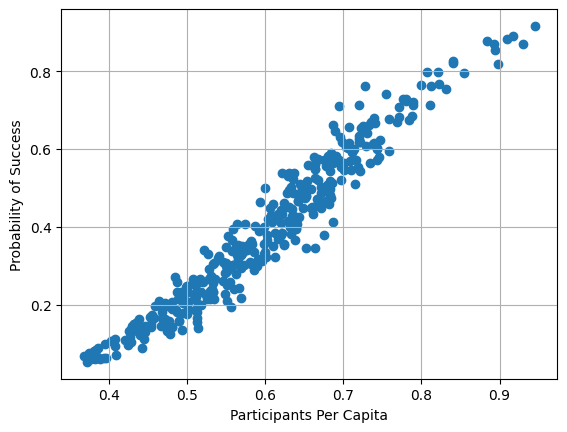

In [65]:
plt.scatter(regression_frame['MembershipPerCapita'], predictions)
plt.xlabel('Participants Per Capita')
plt.ylabel('Probability of Success')
plt.grid(True)
# Set x-axis range
# Set x-axis ticks
plt.show()

* We can see that the scatter plot does not appear as a straight line.

* That's due to the influence of the `LogPopulation` control variable.

* We saw that the logged population affects the chances of success.

* So 2 events, with the same percentage participation, will not have the same chances of succes.

* Their chances differ slightly based on the logged population.

>Then, do the same but with only the membership per capital as dependent variable. Your plot should look like this (explain why is this different than the previous one):

* We can see what happens when we do not account for the Logged Population:

In [66]:
success_logit_model2 = logit('Success ~ MembershipPerCapita', data=regression_frame).fit()
predictions2 = success_logit_model2.predict(regression_frame)
success_logit_model2.summary()

Optimization terminated successfully.
         Current function value: 0.585556
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Success   No. Observations:                  380
Model:                          Logit   Df Residuals:                      378
Method:                           MLE   Df Model:                            1
Date:                Mon, 04 Dec 2023   Pseudo R-squ.:                  0.1225
Time:                        12:09:35   Log-Likelihood:                -222.51
converged:                       True   LL-Null:                       -253.58
Covariance Type:            nonrobust   LLR p-value:                 3.204e-15
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -5.3469      0.709     -7.536      0.000      -6.737      -3.956
MembershipPerCapita     8.0495      1.141      7.052      0.000       5.812      10.287
=======================================================================================
"""

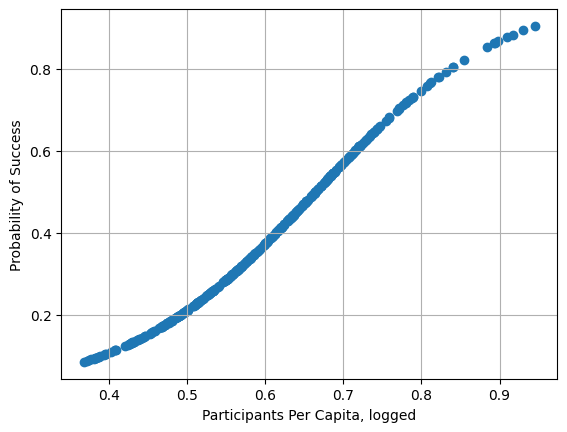

In [67]:
plt.scatter(regression_frame['MembershipPerCapita'], predictions2)
plt.xlabel('Participants Per Capita, logged')
plt.ylabel('Probability of Success')
plt.grid(True)
# Set x-axis range
# Set x-axis ticks
plt.show()

* We can see that with only 1 variable the line smooths out since the 'noise' from the Logged Population is not present .

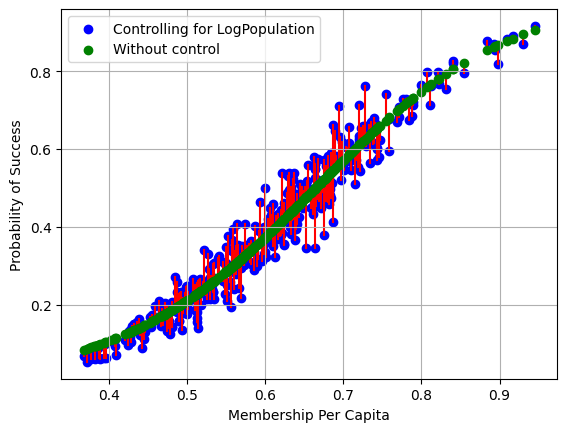

In [96]:
#show 2 original plots
plt.scatter(regression_frame['MembershipPerCapita'], predictions, 
            zorder = -1,label='Controlling for LogPopulation', color='blue')
plt.scatter(regression_frame['MembershipPerCapita'], predictions2, 
            zorder = 1,label='Without control', color='green')
#cionnect points from old to new
for i, (x, y1, y2) in enumerate(zip(regression_frame['MembershipPerCapita'], predictions, predictions2)):
    plt.plot([x, x], [y1, y2], color='red', linestyle='-', zorder = 0)

plt.xlabel('Membership Per Capita')
plt.ylabel('Probability of Success')
plt.legend()
plt.grid(True)
plt.show()

* We can see the vertical movement caused by the control variable in the model with the control variable being removed when we remove the control variable.

## 4. The Level of Participation Tipping Point

>As we mentioned above, a famous output of the research is the 3.5% rule regarding the population participation in a campaign and the probability of success.
>Based on your data, create a table like the one below and explain how Chenoweth came up with the rule.

* We can use the dataframe we created for the previous question since it contains all we need.

In [68]:
#bins and labels
bins = [0, 0.000035, 0.00015, 0.0006, 0.0025, 0.01, 0.035, float('inf')]
labels = [
    'less than 0.0035%',
    '0.0035% - 0.015%','0.015% - 0.06%','0.06% - 0.25%',
    '0.25% - 1.0%','1.0% - 3.5%','greater than 3.5%'
]
#bin the data depending on participation
regression_frame['ParticipationBin'] = \
    pd.cut(regression_frame['PercentagePopulation'], bins=bins, labels=labels)
#group by bin and count
table = regression_frame.groupby('ParticipationBin', observed=True)['Success']\
            .agg(['count', 'mean']).reset_index()
#rename columns
table.columns = ['Peak Popular Participation (%)', 'Observations',
                  'Success Rate']
#formatting
table['Success Rate'] = table['Success Rate'].map('{:.2%}'.format)

table[::-1].style.hide()

Peak Popular Participation (%),Observations,Success Rate
greater than 3.5%,18,88.89%
1.0% - 3.5%,41,60.98%
0.25% - 1.0%,92,45.65%
0.06% - 0.25%,95,45.26%
0.015% - 0.06%,66,24.24%
0.0035% - 0.015%,44,9.09%
less than 0.0035%,24,4.17%


* In a [short publication answering questions](https://carrcenter.hks.harvard.edu/files/cchr/files/CCDP_005.pdf) about her book, Chenoweth states how she came up with the rule:<br/>

*In 2013, I was attending a workshop with a number of activists, and several of them asked me how many people it takes to win a movement...*<br/>

*To generate my own figure, I turned to the NAVCO 1.1 dataset and established a new indicator for each campaign documenting its percentage of popular participation...* <br/>

*From there, I observed that the movements that showed at least 3.5% popular participation had all succeeded.*

* The rule was made with the *NAVCO 1.1 dataset*, the previous version, where no campaigns with more than `3.5%` of the population participating and had failed were included.

* So the rule is more of an observation than anything and serves as a rule of thumb, that has since its conception been proven wrong twice.

> Apart from the way Chenoweth came up with the rule, we can derive it in more statistically-based way.  From the results you obtained in the previous question, find the percentage of the population that is the tipping point for success in a campaign with 99% probability.

* If we take a look at our predictions (using the model with no control variables), we can see that:

In [100]:
predictions2.max()

0.9054891294148191

* There is no campaign that ever had a `99%` probability of success (best we got was `90%`).

* But a logistic regression model does not just provide a line on which the predictions fall on, but rather an area on which the success probability will be located on.

* That is the *confidence interval* of our model.

* If we draw it we can take a better look:

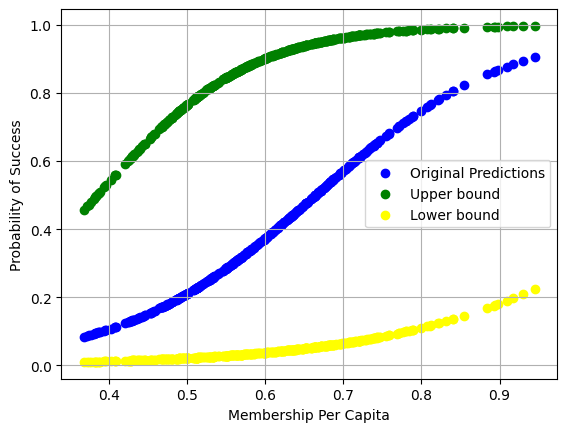

In [120]:
upper_bound = (1/(1+np.exp(-(-3.956 + 10.28*regression_frame['MembershipPerCapita']))))
lower_bound = (1/(1+np.exp(-(-6.737 + 5.812*regression_frame['MembershipPerCapita']))))
#show 2 original plots
plt.scatter(regression_frame['MembershipPerCapita'], predictions2, 
            label='Original Predictions',color='blue')
plt.scatter(regression_frame['MembershipPerCapita'], upper_bound, 
            label='Upper bound', color='green')
plt.scatter(regression_frame['MembershipPerCapita'], lower_bound, 
            label='Lower bound', color='yellow')

plt.xlabel('Membership Per Capita')
plt.ylabel('Probability of Success')
plt.grid(True)
_ = plt.legend()

* We can see that the prediction for `MembershipPerCapita` is located between the green and red lines.

* If we take a look at the predictions for the upper bound:

In [112]:
upper_bound.max()

0.9968538183091536

* We can see that it reaches `99%` probability of success. So we're looking for the intercept of the upper bound with the $y = 0.99$ function, or the red point below:

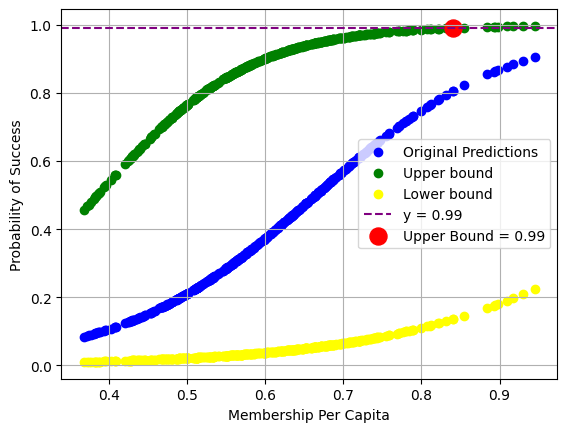

In [127]:
#conf intervals
plt.scatter(regression_frame['MembershipPerCapita'], predictions2, 
            label='Original Predictions',color='blue')
plt.scatter(regression_frame['MembershipPerCapita'], upper_bound, 
            label='Upper bound', color='green')
plt.scatter(regression_frame['MembershipPerCapita'], lower_bound, 
            label='Lower bound', color='yellow')
#y=0.99
plt.axhline(y=0.99, color='purple', linestyle='--', label='y = 0.99')
#mark the intersection
intersection_point = np.where(upper_bound >= 0.99)[0][0]
plt.scatter(regression_frame['MembershipPerCapita'].iloc[intersection_point], 
            0.99, color='red', marker='o', label='Upper Bound = 0.99', s=150)
plt.xlabel('Membership Per Capita')
plt.ylabel('Probability of Success')
plt.grid(True)
_ = plt.legend()

* Which is:

In [130]:
intersection_point_index = np.where(upper_bound >= 0.99)[0][0]
intersection_membership_per_capita = regression_frame['MembershipPerCapita'].iloc[intersection_point_index]
intersection_membership_per_capita

0.8403388124273167

* Explaining the maths of how we find the intercept:

* The formula for our logistic model regression(the upper bound) is this:
$$ p(x) = \frac{1}{1 + e^{(-3.956 - 10.287x)}} $$

* Where *x* is `MembershipPerCapita`.

* Since we want $p(x) = 0.99$ we solve for `MembershipPerCapita`:

$$MembershipPerCapita = \frac{ln(\frac{0.99}{1-0.99}) - 3.956}{10.287}$$

which gives us:

In [135]:
(np.log(0.99/(1 - 0.99)) + 3.956)/10.287

0.8312549674477095

* The numbers appear to be a bit different.

* A campaign needs `0.83` MembershipPerCapita to have a `99%` chance of success.

* Our dataset did not have a campaign with MembershipPerCapita equal to that, so it intercepted the $y = 0.99$ line at `0.84`.

* But the question was to find the tipping point for percentage of popular participation, not MembershipPerCapita.

* We find the campaigns with MembershipPerCapita more than `0.8312`, and we keep the smallest percentage popular participation as the tipping point.

In [139]:
regression_frame[regression_frame['MembershipPerCapita'] >= 0.8312]['PercentagePopulation'].min()

0.0526315789473684

* So a campaign needs at least `5.2%` of the population participating at its peak event to have a `99%` chance of success.

## 5. Nonviolent Resistance and Target Regime Type

>Examine whether nonviolent resistance remains significant even if we control for the regime type. Run a logistic   regression of success on the nonviolence indicator controlling for the Polity V score of campaign target, the log of participation, and the location’s logged population the year the campaign ends.

* We have already imported the Polity data above.

* We want to merge our data so that we know the Polity V score of each country the year the campaign ended.

* Merging based on country name can be difficult, since those names change and come in different forms.

* A good idea would be to match them on a standardized format that is more trustworthy.

* We use a module named [country-converter](https://pypi.org/project/country-converter/) to get the `ISO3` 3 letter code of each country and match that.

* It's not perfect, we still miss some matches.

* But it's simple enough and the loss we get is about `20-25` events, which we can cope with.

In [70]:
import country_converter as coco
import logging
coco_logger = coco.logging.getLogger()
coco_logger.setLevel(logging.CRITICAL)#don't warn don't print unless something terrible happens
cc = coco.CountryConverter()
#those 2 countries' codes were producing mismatches so it was better to drop them
navco_data = navco_data[(navco_data['LOCATION'] != 'Yugoslavia') & (navco_data['LOCATION'] != 'South Vietnam')]
#get codes
navco_data['CODE'] = cc.pandas_convert(series = navco_data['LOCATION'], to = 'ISO3')
polity_data['CODE'] = cc.pandas_convert(series = polity_data['country'], to = 'ISO3')
merged_df = pd.merge(polity_data, navco_data, how='inner', left_on=['year', 'CODE'], right_on=['EYEAR', 'CODE'])
#drop na
merged_df = merged_df.dropna(subset=['PARTICIPATION'])
#calculate lpop and lpart in new frame
merged_df['LPARTICIPATION'] = np.log(merged_df['PARTICIPATION'])
merged_df['POPULATION'] = merged_df['PARTICIPATION'] / merged_df['PERCENTAGEPOPULARPARTICIPATION']
merged_df['LPOPULATION'] = np.log(merged_df['POPULATION'])
merged_df = merged_df.dropna(subset=['polity2'])

* The matching does produce some mismatches, hence why we removed some countries that were very problematic.

* But those are not enough to hinder the final result.

* We can now run our model.

* Our model tries to predict the success of an event based on:
1. `NONVIOL`: binary variable that is 1 if an event was non-violent, 0 otherwise.
2. `polity2`: score of `[-10, 10]` with `-10` being absolute autocract and `10` being a perfect democracy. Measured on the year the campaign ended.
3. `LParticipation`: the logged participation of the campaign on its peak.
4. `LPopulation`: the logged population of the campaign on its peak.

In [71]:
polity_model = logit('SUCCESS ~ NONVIOL + polity2 + LPARTICIPATION + LPOPULATION', data=merged_df).fit()
polity_model.summary()

Optimization terminated successfully.
         Current function value: 0.524584
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                SUCCESS   No. Observations:                  351
Model:                          Logit   Df Residuals:                      346
Method:                           MLE   Df Model:                            4
Date:                Mon, 04 Dec 2023   Pseudo R-squ.:                  0.1984
Time:                        12:09:35   Log-Likelihood:                -184.13
converged:                       True   LL-Null:                       -229.72
Covariance Type:            nonrobust   LLR p-value:                 7.418e-19
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.2344      1.462      2.212      0.027       0.368       6.100
NONVIOL            0.9419      0.282      3.334      0.001       0.388       1.496
polity2            0.0559      0.023      2.390      0.017       0.010       0.102
LPARTICIPATION     0.3539      0.081      4.354      0.000       0.195       0.513
LPOPULATION       -0.4686      0.094     -5.011      0.000      -0.652      -0.285
==================================================================================
"""

* The results are very positive.

* We get a *Pseudo R-squared* of `0.198`, with the strongest models having a `0.2-0.4` value. That means it's predictive prowess is great.

* Also all variables have near-zero *p-values*, that means that they are all useful for predicting.

* `NONVIOL` has a coefficient of `0.94`, meaning that if an event is non-violent its chances of success are $e^{0.94} \approx 2.5$ bigger.

* `polity2` has a coefficient of `0.05` which means the more strict a government is, the more likely the campaign is to fail.

* From the coefficients of `LParticipation` & `LPopulation` we gather that more participation helps the campaigns chances, while the more population a nation has the less likely the campaign is to succeed.

* If we take a closer look, we can see that:

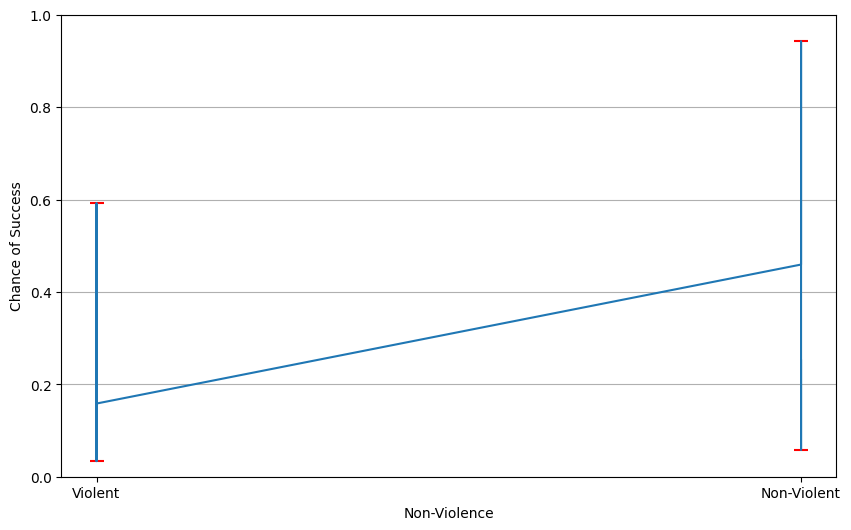

In [72]:
predictions = polity_model.predict(merged_df)
# Sort the data by the 'NONVIOL' column
merged_df_sorted = merged_df.sort_values(by='NONVIOL')

# Plot the margins plot
plt.figure(figsize=(10, 6))
plt.plot(merged_df_sorted['NONVIOL'], predictions[merged_df_sorted.index], linestyle='-')
# Identify indices for highest and lowest probabilities for violent and nonviolent events
violent_max_idx = predictions[merged_df_sorted[merged_df_sorted['NONVIOL'] == 1].index].idxmax()
violent_min_idx = predictions[merged_df_sorted[merged_df_sorted['NONVIOL'] == 1].index].idxmin()
nonviolent_max_idx = predictions[merged_df_sorted[merged_df_sorted['NONVIOL'] == 0].index].idxmax()
nonviolent_min_idx = predictions[merged_df_sorted[merged_df_sorted['NONVIOL'] == 0].index].idxmin()

# Add markers for highest and lowest probabilities
plt.scatter(merged_df_sorted['NONVIOL'].loc[[violent_max_idx, violent_min_idx, nonviolent_max_idx, nonviolent_min_idx]],
            predictions.loc[[violent_max_idx, violent_min_idx, nonviolent_max_idx, nonviolent_min_idx]],
            marker='_', color='red', s=100)
# Add labels and title
plt.xlabel('Non-Violence')
plt.ylabel('Chance of Success')
plt.xticks([0,1],['Violent', 'Non-Violent'])
plt.ylim(0, 1)
plt.grid(axis='y')
# Show the plot
plt.show()

* As we saw from all the models drawn above there are a lot of factors at play that decide the success of an event.

* Non-violence does not guarantee the succes of an event.

* It just allows it to reach higher chances of success.
